In [1]:
import sympy as sym
from IPython.display import display, Math
w = sym.Symbol('w')
t = sym.Symbol('t',real=True)
epsilon = sym.Symbol('epsilon', positive=True)
result = sym.integrate(w*sym.exp(-epsilon*w)*sym.cos(w*t), (w, 0, sym.oo))
print(result)
display(Math(f"{sym.latex(result)}"))

Piecewise((2*(-epsilon**2/t**2 + 1)/(t**2*(-2*epsilon**2/t**2 - 2)*(epsilon**2/t**2 + 1)), Eq(Abs(arg(t)), 0)), (Integral(w*exp(-epsilon*w)*cos(t*w), (w, 0, oo)), True))


<IPython.core.display.Math object>

$$ \xi \left(t\right) = \int_{-\infty}^{\infty} \sqrt{J \left(\omega\right)} z\left(\omega\right) \exp \left(-i w t\right) d\omega $$

We have the following:

$$ \int_{0}^{\infty} w \exp(-\epsilon w) \cos(t w) = \frac{\epsilon^2 - t^2}{\left(\epsilon^2 + t^2\right)^2}$$

Therefore, we generate the noise samples as:

$$ \xi \left(t\right) = \frac{1}{\sqrt{2}} \int_{-\infty}^{\infty} \sqrt{J \left(\left|\omega\right|\right)} z\left(\omega\right) \exp \left(-i w t\right) d\omega $$

where $$z^{*}\left(\omega\right) = z\left(-w\right)$$, $$ \left\langle z\left(\omega\right) z^{*}\left(\omega^{\prime}\right) \right\rangle = \delta\left(\omega-\omega^\prime\right) $$, $$ J\left(w\right) = w \exp(-\epsilon w) $$

1. Numerically, we introduce grid in $\omega$: $\omega_0 = 0$, $\omega_1 = \Delta\omega$, ..., $\omega_k = k \Delta \omega$, ...

2. Generate random independent complex numbers numbers: $\langle z_k \rangle = 0$, $\langle z_k z^{*}_l \rangle= \delta_{kl}$, $z_{-k} \equiv z^{*}_{k}$

$$\xi(t) = \sqrt{\frac{\Delta\omega}{2}} \sum_{k=-N}^{N} z_k \sqrt{J_k} \exp \left(-i w_k t \right)$$

where 

$$ J_k = J\left(\left|\omega_k\right|\right)$$ 

The following idenity takes place:

$$ \int_{-\infty}^{\infty} \cos(t w^{\prime}) \cos(t w) d t= \pi \delta \left(\omega - \omega^{\prime} \right) $$

In [59]:
import numpy as np
import math
import matplotlib.pyplot as plt

/home/evgenii/condmat/lightcones_2025/Caldeira-Leggett-Langevin/lightcones/venv/lib/python3.11/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/evgenii/condmat/lightcones_2025/Caldeira-Leggett-Langevin/lightcones/venv/lib/python3.11/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


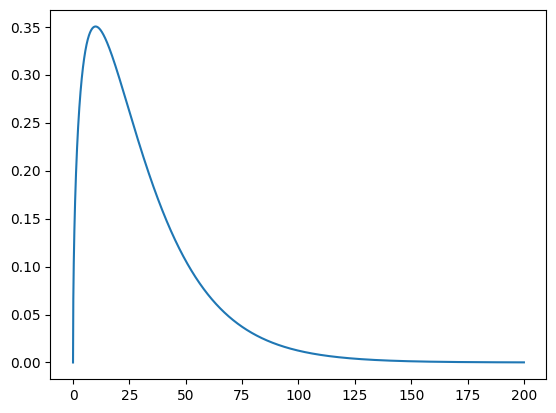

In [60]:
w_max = 200
w = np.linspace(0, w_max, num=3000)
n_w = len(w)
dw = w[1] - w[0]
epsilon = 0.1
sqrt_J = np.zeros(n_w, dtype=complex)

for i in range(n_w):
    sqrt_J[i] = math.sqrt(dw / 2) * math.sqrt(w[i] * math.exp(-epsilon * w[i]))

plt.plot(w, sqrt_J)

In [72]:
t_max = 2.5
t = np.linspace(-t_max, t_max, num=100)
n_t = len(t)

m = 100000

corr = np.zeros((n_t, n_t))

for i in range(m):
    z = np.random.normal(size=n_w) + 1j * np.random.normal(size=n_w)
    z = z / math.sqrt(2)
    xi = np.zeros(n_t, dtype=complex)
    for j in range(n_t):
        e = np.exp(-1j * w * t[j])
        xi_pos = z * sqrt_J * e
        xi_neg = xi_pos.conjugate()
        xi[j] = np.sum(xi_pos) + np.sum(xi_neg[1:]) 
    for p in range(n_t):
        for q in range(n_t):
            corr[p, q] += xi[p] * xi[q]
            
corr = corr / m        



/tmp/ipykernel_3972/1524900963.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  corr[p, q] += xi[p] * xi[q]


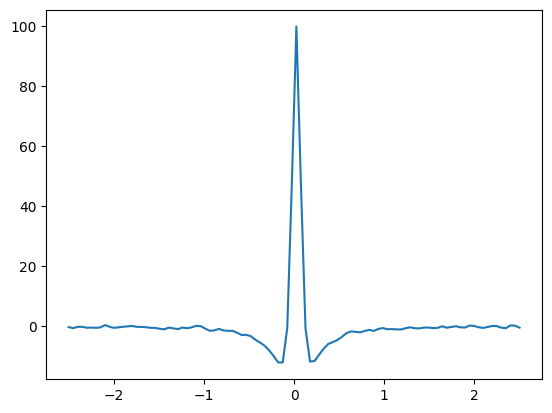

In [73]:
plt.plot(t, corr[n_t//2, :])

In [74]:
corr_the = np.zeros((n_t, n_t))

for p in range(n_t):
    for q in range(n_t):
        tau = t[p] - t[q]
        corr_the[p, q] = (epsilon**2 - tau**2) / (epsilon**2 + tau**2)**2

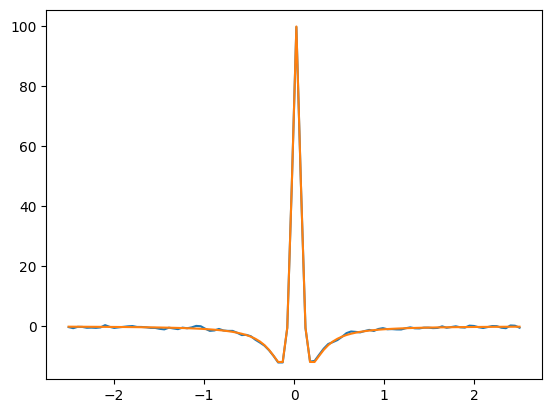

In [75]:
plt.plot(t, corr[n_t//2, :])
plt.plot(t, corr_the[n_t//2, :])